In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: Input data for hours studied (X) and test scores (Y)
def create_data():
    data = {'Hours Studied (X)': [1, 2, 3, 4, 5],
            'Test Score (Y)': [50, 60, 70, 80, 90]}
    return pd.DataFrame(data)

# Step 2: Calculate the Pearson correlation coefficient (r)
def calculate_pearson_r(df):
    """
    Calculate Pearson's r for the given DataFrame.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing 'Hours Studied (X)' and 'Test Score (Y)' columns.
        
    Returns:
        float: Pearson correlation coefficient.
    """
    mean_X = df['Hours Studied (X)'].mean()
    mean_Y = df['Test Score (Y)'].mean()

    # Compute deviations from the mean
    df['X_i - X̄'] = df['Hours Studied (X)'] - mean_X
    df['Y_i - Ȳ'] = df['Test Score (Y)'] - mean_Y

    # Compute product of deviations and squared deviations
    df['(X_i - X̄)(Y_i - Ȳ)'] = df['X_i - X̄'] * df['Y_i - Ȳ']
    df['(X_i - X̄)^2'] = df['X_i - X̄'] ** 2
    df['(Y_i - Ȳ)^2'] = df['Y_i - Ȳ'] ** 2

    # Calculate sums for Pearson's r formula
    sum_product_deviations = df['(X_i - X̄)(Y_i - Ȳ)'].sum()
    sum_squared_X_deviations = df['(X_i - X̄)^2'].sum()
    sum_squared_Y_deviations = df['(Y_i - Ȳ)^2'].sum()

    # Pearson's r formula
    pearson_r = sum_product_deviations / (np.sqrt(sum_squared_X_deviations * sum_squared_Y_deviations))

    return pearson_r, df

# Step 3: Plotting the data points and results
def plot_data(df, pearson_r):
    """
    Plot the scatter plot of the data along with Pearson's r.

    Parameters:
        df (pd.DataFrame): DataFrame containing 'Hours Studied (X)' and 'Test Score (Y)' columns.
        pearson_r (float): Pearson correlation coefficient to display on the plot.
    """
    mean_X = df['Hours Studied (X)'].mean()
    mean_Y = df['Test Score (Y)'].mean()

    plt.figure(figsize=(8, 6))
    plt.scatter(df['Hours Studied (X)'], df['Test Score (Y)'], color='blue', label='Data points')
    plt.plot(df['Hours Studied (X)'], df['Test Score (Y)'], color='red', label=f'Y = 10X + 40')

    # Adding labels and title
    plt.title('Scatter Plot of Hours Studied and Test Scores', fontsize=14)
    plt.xlabel('Hours Studied (X)')
    plt.ylabel('Test Score (Y)')
    
    # Plot mean lines
    plt.axhline(mean_Y, color='green', linestyle='--', label='Mean Test Score')
    plt.axvline(mean_X, color='green', linestyle='--', label='Mean Hours Studied')

    # Display Pearson's r on the plot
    plt.text(1, 85, f"Pearson's r = {pearson_r:.2f}", fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    # Display legend
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

In [3]:
# Step 1: Create data
df_pearson = create_data()

# Step 2: Calculate Pearson's r
pearson_r, df_pearson = calculate_pearson_r(df_pearson)

# Display dataframe for reference (optional)
print("Pearson Correlation Calculation")
print(df_pearson)

Pearson Correlation Calculation
   Hours Studied (X)  Test Score (Y)  X_i - X̄  Y_i - Ȳ  \
0                  1              50      -2.0     -20.0   
1                  2              60      -1.0     -10.0   
2                  3              70       0.0       0.0   
3                  4              80       1.0      10.0   
4                  5              90       2.0      20.0   

   (X_i - X̄)(Y_i - Ȳ)  (X_i - X̄)^2  (Y_i - Ȳ)^2  
0                  40.0           4.0         400.0  
1                  10.0           1.0         100.0  
2                   0.0           0.0           0.0  
3                  10.0           1.0         100.0  
4                  40.0           4.0         400.0  


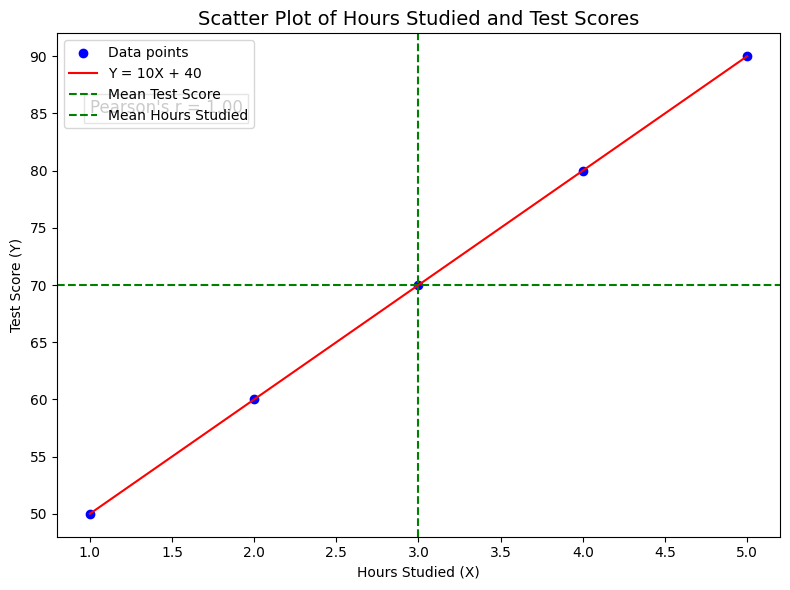

In [4]:
# Step 3: Plot the data and results
plot_data(df_pearson, pearson_r)